In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#!pip install scikit-learn==1.0.0


In [3]:
#!pip install statsmodels==0.12.2   #conda update --all

In [4]:
#!pip install --upgrade numpy pandas

In [5]:
#!pip uninstall pandas -y

In [6]:
#!pip install pandas

In [7]:
#!pip install nsepy

In [8]:
#!pip install yfinance

In [9]:
#!pip install --upgrade --force-reinstall cffi

In [10]:
from nsepy import get_history as gh
import datetime as dt
import yfinance as yf
stock_symbol = "RELIANCE.NS" #NSE stocks usually end with .NS
# Download stock data
stk_data = yf.download(stock_symbol, start="2023-01-01", end="2023-07-01")

C:\Users\Admin\anaconda3\envs\aitd\Lib\site-packages\yfinance\scrapers\history.py:201: Pandas4Warning: Timestamp.utcnow is deprecated and will be removed in a future version. Use Timestamp.now('UTC') instead.
  dt_now = pd.Timestamp.utcnow()
[*********************100%***********************]  1 of 1 completed


In [11]:
stk_data

Price,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,
2023-01-02,1175.889648,1177.304802,1163.244669,1164.066352,5316175
2023-01-03,1167.284668,1174.565828,1163.062148,1170.936659,7658932
2023-01-04,1149.709595,1169.110728,1147.632506,1167.261851,9264891
2023-01-05,1147.655396,1157.858149,1143.067616,1151.969321,13637099
2023-01-06,1158.086304,1163.130627,1149.595501,1153.407240,6349597
...,...,...,...,...,...
2023-06-23,1147.974976,1156.488600,1146.719570,1154.434333,6628570
2023-06-26,1139.210083,1148.271535,1136.083100,1144.436976,12641159


In [12]:
stk_data=stk_data[["Open","High","Low","Close"]]


In [13]:
stk_data

Price,Open,High,Low,Close
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,
2023-01-02,1164.066352,1177.304802,1163.244669,1175.889648
2023-01-03,1170.936659,1174.565828,1163.062148,1167.284668
2023-01-04,1167.261851,1169.110728,1147.632506,1149.709595
2023-01-05,1151.969321,1157.858149,1143.067616,1147.655396
2023-01-06,1153.407240,1163.130627,1149.595501,1158.086304
...,...,...,...,...
2023-06-23,1154.434333,1156.488600,1146.719570,1147.974976
2023-06-26,1144.436976,1148.271535,1136.083100,1139.210083


In [14]:
column="Close"

In [15]:
#!pip uninstall scikit-learn -y

In [16]:
#!pip uninstall sklearn -y

In [17]:
#!pip cache purge

In [18]:
#!pip install --upgrade --force-reinstall scipy

In [19]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1= Ms.fit_transform(stk_data[[column]])
print("Len:",data1.shape)

Len: (122, 1)


In [20]:
len(data1)

122

In [21]:
training_size = round(len(data1 ) * 0.80)
print(training_size)
X_train=data1[:training_size]
X_test=data1[training_size:]
print("X_train length:",X_train.shape)
print("X_test length:",X_test.shape)
y_train=data1[:training_size]
y_test=data1[training_size:]
print("y_train length:",y_train.shape)
print("y_test length:",y_test.shape)

98
X_train length: (98, 1)
X_test length: (24, 1)
y_train length: (98, 1)
y_test length: (24, 1)


In [22]:
#!pip install --upgrade scikit-learn

In [23]:
from sklearn.metrics import mean_squared_error
trends=['n','t','c','ct']
lags=[1,2,3,4]
from statsmodels.tsa.ar_model import AutoReg
for i in lags:
    #print(i)
   
    for td in trends:
        
        #print(td)
        #trenAdslist.append(td)
        model = AutoReg(X_train, lags=i,trend=td)
        model_fit = model.fit()
        # make prediction
        y_pred= model_fit.predict(len(X_train), len(data1)-1)
        print(y_pred)
        
        
        

[0.75962167 0.74772143 0.73600762 0.72447731 0.71312764 0.70195577
 0.69095893 0.68013435 0.66947936 0.65899129 0.64866752 0.63850549
 0.62850266 0.61865652 0.60896464 0.5994246  0.590034   0.58079052
 0.57169185 0.56273572 0.5539199  0.54524218 0.53670041 0.52829245]
[0.77554349 0.77962971 0.78395618 0.78850984 0.79327835 0.79825002
 0.80341383 0.80875932 0.81427663 0.81995643 0.82578987 0.83176861
 0.83788477 0.84413086 0.85049983 0.856985   0.86358006 0.87027904
 0.87707628 0.88396646 0.89094451 0.89800567 0.90514542 0.91235949]
[0.74863465 0.72718094 0.70723605 0.68869386 0.67145572 0.65542992
 0.6405312  0.62668029 0.61380349 0.60183231 0.59070304 0.58035649
 0.57073759 0.56179519 0.55348169 0.54575287 0.5385676  0.53188767
 0.52567754 0.51990415 0.5145368  0.50954693 0.50490799 0.5005953 ]
[0.77183409 0.77236568 0.7732811  0.77455692 0.77617114 0.77810308
 0.78033334 0.78284371 0.78561707 0.78863738 0.79188955 0.79535941
 0.79903368 0.80289987 0.80694627 0.81116187 0.81553633 0.8

In [24]:
from sklearn.metrics import mean_squared_error
import numpy as np
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE", rmse)

RMSE 0.08001462710241991


In [25]:
len(y_pred)

24

In [26]:
#!pip install -U scikit_learn

In [27]:
i=1
td='ct'
model = AutoReg(X_train, lags=i,trend=td)
model_fit = model.fit()
# make prediction
y_pred= model_fit.predict(start=len(X_train), end=len(X_train)+len(y_test)-1)
print(y_pred)
from sklearn.metrics import mean_squared_error

mse=mean_squared_error(y_test,y_pred)
#rmse = mean_squared_error(y_test, y_pred, squared=False)
#from stockFunctions import rmsemape
#print("Lag={},Trend={}".format(i,td))
#print("RMSE:",rmse)
print("************")

[0.77183409 0.77236568 0.7732811  0.77455692 0.77617114 0.77810308
 0.78033334 0.78284371 0.78561707 0.78863738 0.79188955 0.79535941
 0.79903368 0.80289987 0.80694627 0.81116187 0.81553633 0.82005995
 0.82472363 0.82951881 0.83443746 0.83947204 0.84461548 0.84986112]
************


In [28]:
#!pip install "numpy<2"

In [29]:
#!pip install "numpy<2,>=1.18"

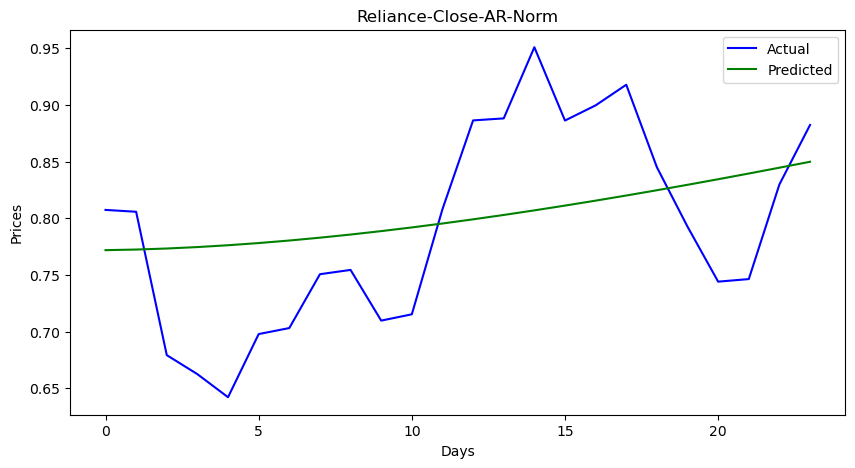

In [30]:
from stockFunctions import graph
graph(y_test,y_pred,"Actual","Predicted","Reliance-Close-AR-Norm","Days","Prices")


In [31]:
len(data1)

122

In [32]:
y_test

array([[0.80735678],
       [0.80571469],
       [0.67918059],
       [0.66236954],
       [0.64201808],
       [0.69776353],
       [0.70307178],
       [0.75060066],
       [0.75439256],
       [0.70964558],
       [0.71520735],
       [0.80798888],
       [0.88636133],
       [0.8881312 ],
       [0.95095545],
       [0.88623491],
       [0.89963399],
       [0.91783633],
       [0.84502632],
       [0.79256845],
       [0.74402754],
       [0.74630376],
       [0.82985805],
       [0.88231592]])

In [33]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])

In [34]:
aTestNormTable

,Close
0,0.807357
1,0.805715
2,0.679181
3,0.66237
4,0.642018
5,0.697764
6,0.703072
7,0.750601
8,0.754393
9,0.709646


In [35]:
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)

In [36]:
actual_stock_price_test_ori

array([[1150.64526367],
       [1150.34875488],
       [1127.50085449],
       [1124.46533203],
       [1120.79052734],
       [1130.85632324],
       [1131.81481934],
       [1140.39697266],
       [1141.08166504],
       [1133.00183105],
       [1134.00610352],
       [1150.75939941],
       [1164.91088867],
       [1165.23046875],
       [1176.57446289],
       [1164.88806152],
       [1167.30749512],
       [1170.59423828],
       [1157.44714355],
       [1147.97497559],
       [1139.21008301],
       [1139.62109375],
       [1154.70825195],
       [1164.18041992]])

In [37]:
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,[column])

In [38]:
actual_stock_price_test_oriA

,Close
0,1150.645264
1,1150.348755
2,1127.500854
3,1124.465332
4,1120.790527
5,1130.856323
6,1131.814819
7,1140.396973
8,1141.081665
9,1133.001831


In [39]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,[column])

In [40]:
from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(y_pred,[column])
predicted_stock_price_test_ori=Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,[column])

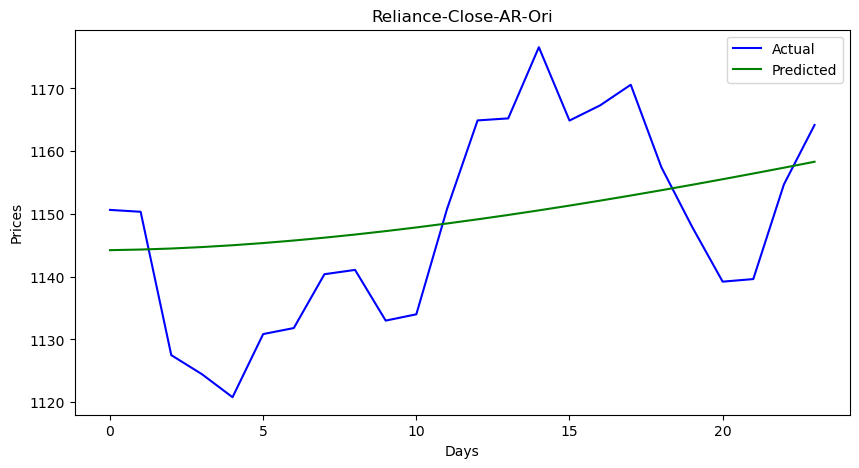

In [41]:
from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","Reliance-Close-AR-Ori","Days","Prices")

In [43]:
forecast=model_fit.predict(len(data1), len(data1)+3)

In [44]:
forecast

array([0.85520272, 0.86063443, 0.86615073, 0.87174647])

In [45]:
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,["Closefore"])
forecast_stock_price_test_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["Closefore"])

In [46]:
forecast_stock_price_test_oriF

,Closefore
0,1159.284668
1,1160.265455
2,1161.261519
3,1162.271926


In [47]:
forecast_stock_price_test_oriF.to_csv("CloseAR.csv",index=False)

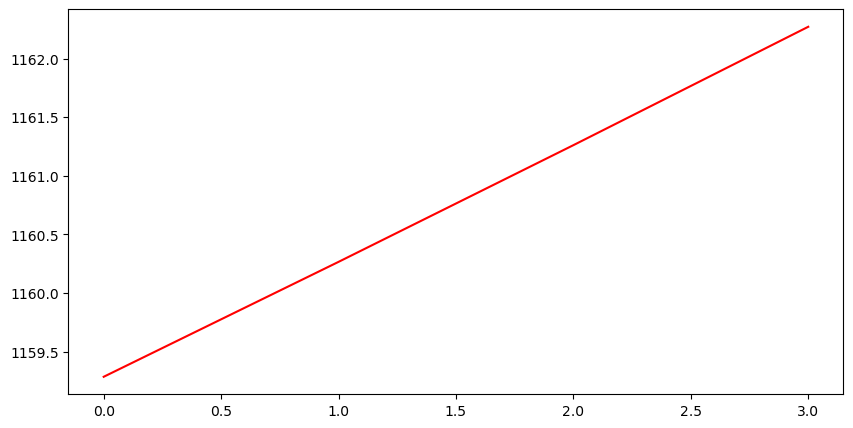

In [48]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(actual_stock_price_test_oriA[116:145], color = 'blue', label="Actual")
plt.plot(forecast_stock_price_test_oriF, color = 'red', label ="Predicted")